### Step 1 Problem Statement

- Online company review platforms generate large volumes of data related to ratings, reviews, salaries, jobs, and employee experiences.

- Due to the complexity and size of the data, it is difficult to manually identify trends and relationships across companies, sectors, and cities.

- There is limited clarity on how factors such as company sector, location, job availability, benefits, and salaries impact overall company ratings.

- A structured Exploratory Data Analysis (EDA) approach is required to extract meaningful insights and support informed decision-making for job seekers, recruiters, and organizations.

##### Import Library

In [4]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import warnings 
warnings.filterwarnings("ignore")

##### Webscraping

In [1]:
company_names = []
ratings = []
reviews_count = []
salary_count = []
interview_count = []
jobs_count = []
company_sector = []
locations = []
benefits_count = []
page_num = []

base_url = "https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9'}

total_time = time.time()

for i in range(1, 90):  
    start_time = time.time()
    url = f"{base_url}&page={i}"
    page = requests.get(url, headers=headers)
    s = BeautifulSoup(page.text, "html.parser")

    cards = s.find_all('div', attrs={'class': 'companyCardWrapper'})
    if not cards:
        print(f"No data found on page {i}, stopping...")
        break

    # Company Name
    for x in s.find_all('h2', attrs={'class': 'companyCardWrapper__companyName'}):
        company_names.append(x.text.strip() if x else np.nan)

    # Rating
    for x in s.find_all('div', attrs={'class': 'rating_star_container'}):
        ratings.append(x.text.strip() if x else np.nan)

    # Reviews
    for x in s.find_all('span', attrs={'class': 'companyCardWrapper__ActionTitle'}, string='Reviews'):
        val = x.find_previous_sibling('span')
        reviews_count.append(val.text.strip() if val else np.nan)

    # Salaries
    for x in s.find_all('span', attrs={'class': 'companyCardWrapper__ActionTitle'}, string='Salaries'):
        val = x.find_previous_sibling('span')
        salary_count.append(val.text.strip() if val else np.nan)

    # Interviews
    for x in s.find_all('span', attrs={'class': 'companyCardWrapper__ActionTitle'}, string='Interviews'):
        val = x.find_previous_sibling('span')
        interview_count.append(val.text.strip() if val else np.nan)

    # Jobs
    for x in s.find_all('span', attrs={'class': 'companyCardWrapper__ActionTitle'}, string='Jobs'):
        val = x.find_previous_sibling('span')
        jobs_count.append(val.text.strip() if val else np.nan)

    # Sector and Location
    for x in s.find_all('span', attrs={'class': 'companyCardWrapper__interLinking'}):
        text = x.text.strip()
        parts = text.split('|')
        company_sector.append(parts[0].strip() if len(parts) > 0 else np.nan)
        locations.append(parts[1].strip() if len(parts) > 1 else np.nan)

    # Benefits
    for x in s.find_all('span', attrs={'class': 'companyCardWrapper__ActionTitle'}, string='Benefits'):
        val = x.find_previous_sibling('span')
        benefits_count.append(val.text.strip() if val else np.nan)

    # Page Number
    for _ in range(len(cards)):
        page_num.append(i)

    print(f"Page {i} completed in {time.time() - start_time:.2f} seconds")

print("Total Time Completed in seconds:", str(time.time() - total_time))

Page 1 completed in 2.47 seconds
Page 2 completed in 2.31 seconds
Page 3 completed in 1.96 seconds
Page 4 completed in 1.67 seconds
Page 5 completed in 1.90 seconds
Page 6 completed in 1.83 seconds
Page 7 completed in 2.35 seconds
Page 8 completed in 22.84 seconds
Page 9 completed in 1.26 seconds
Page 10 completed in 1.44 seconds
Page 11 completed in 1.65 seconds
Page 12 completed in 1.05 seconds
Page 13 completed in 1.34 seconds
Page 14 completed in 1.35 seconds
Page 15 completed in 1.43 seconds
Page 16 completed in 1.91 seconds
Page 17 completed in 1.70 seconds
Page 18 completed in 1.01 seconds
Page 19 completed in 1.42 seconds
Page 20 completed in 1.59 seconds
Page 21 completed in 1.27 seconds
Page 22 completed in 1.44 seconds
Page 23 completed in 1.32 seconds
Page 24 completed in 1.47 seconds
Page 25 completed in 1.19 seconds
Page 26 completed in 1.23 seconds
Page 27 completed in 0.93 seconds
Page 28 completed in 0.98 seconds
Page 29 completed in 1.14 seconds
Page 30 completed in 0

### Transforming Raw Data into a Pandas DataFrame

In [4]:
ambition_df=pd.DataFrame({"company_names":company_names,"ratings":ratings,"reviews_count":reviews_count,"salary_count":salary_count,"interview_count":interview_count,"jobs_count":jobs_count,"company_sector":company_sector,"locations":locations,"benefits_count":benefits_count,"page_num":page_num})
ambition_df

,company_names,ratings,reviews_count,salary_count,interview_count,jobs_count,company_sector,locations,benefits_count,page_num
0,TCS,3.3,1.1L,9.8L,11.8k,2.1k,IT Services & Consulting,Bangalore / Bengaluru +439 other locations,10.6k,1
1,Accenture,3.7,71.4k,6.5L,9.2k,42k,IT Services & Consulting,Bangalore / Bengaluru +255 other locations,6.7k,1
2,Wipro,3.6,63.6k,4.8L,6.7k,7.1k,IT Services & Consulting,Hyderabad / Secunderabad +370 other locations,4.6k,1
3,Cognizant,3.6,59.9k,6L,6.3k,710,IT Services & Consulting,Hyderabad / Secunderabad +229 other locations,5.5k,1
4,Capgemini,3.7,51.4k,4.8L,5.4k,2k,IT Services & Consulting,Bangalore / Bengaluru +183 other locations,3.7k,1
...,...,...,...,...,...,...,...,...,...,...
1775,BT E Serv,3.9,598,2.6k,53,--,BPO,Kolkata +6 other locations,132,89
1776,Godrej Industries,4.1,597,2.8k,56,159,Real Estate,Mumbai +68 other locations,63,89
1777,Hamilton Housewares,3.8,597,2.6k,39,6,Consumer Electronics & Appliances,Mumbai +52 other locations,30,89
1778,Fiem Industries,3.6,597,2.6k,27,--,Auto Components,Hosur +28 other locations,52,89


### Exporting a DataFrame to CSV

In [67]:
ambition_df.to_csv("ambition.csv",index=False)

In [5]:
df=pd.read_csv("ambition.csv")
df

,company_names,ratings,reviews_count,salary_count,interview_count,jobs_count,company_sector,locations,benefits_count,page_num
0,TCS,3.3,1.1L,9.8L,11.8k,2.1k,IT Services & Consulting,Bangalore / Bengaluru +439 other locations,10.6k,1
1,Accenture,3.7,71.4k,6.5L,9.2k,42k,IT Services & Consulting,Bangalore / Bengaluru +255 other locations,6.7k,1
2,Wipro,3.6,63.6k,4.8L,6.7k,7.1k,IT Services & Consulting,Hyderabad / Secunderabad +370 other locations,4.6k,1
3,Cognizant,3.6,59.9k,6L,6.3k,710,IT Services & Consulting,Hyderabad / Secunderabad +229 other locations,5.5k,1
4,Capgemini,3.7,51.4k,4.8L,5.4k,2k,IT Services & Consulting,Bangalore / Bengaluru +183 other locations,3.7k,1
...,...,...,...,...,...,...,...,...,...,...
1775,BT E Serv,3.9,598,2.6k,53,--,BPO,Kolkata +6 other locations,132,89
1776,Godrej Industries,4.1,597,2.8k,56,159,Real Estate,Mumbai +68 other locations,63,89
1777,Hamilton Housewares,3.8,597,2.6k,39,6,Consumer Electronics & Appliances,Mumbai +52 other locations,30,89
1778,Fiem Industries,3.6,597,2.6k,27,--,Auto Components,Hosur +28 other locations,52,89


### Step 2 - Data cleaning

In [6]:
# showing first five rows
df.head()

,company_names,ratings,reviews_count,salary_count,interview_count,jobs_count,company_sector,locations,benefits_count,page_num
0,TCS,3.3,1.1L,9.8L,11.8k,2.1k,IT Services & Consulting,Bangalore / Bengaluru +439 other locations,10.6k,1
1,Accenture,3.7,71.4k,6.5L,9.2k,42k,IT Services & Consulting,Bangalore / Bengaluru +255 other locations,6.7k,1
2,Wipro,3.6,63.6k,4.8L,6.7k,7.1k,IT Services & Consulting,Hyderabad / Secunderabad +370 other locations,4.6k,1
3,Cognizant,3.6,59.9k,6L,6.3k,710,IT Services & Consulting,Hyderabad / Secunderabad +229 other locations,5.5k,1
4,Capgemini,3.7,51.4k,4.8L,5.4k,2k,IT Services & Consulting,Bangalore / Bengaluru +183 other locations,3.7k,1


In [7]:
df.shape
print("Number of columns:",df.shape[0])
print("Number of rows:",df.shape[1]) 

Number of columns: 1780
Number of rows: 10


**Observation**

- The DataFrame contains 10 rows and 1780 columns.

In [8]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company_names    1780 non-null   object 
 1   ratings          1780 non-null   float64
 2   reviews_count    1780 non-null   object 
 3   salary_count     1780 non-null   object 
 4   interview_count  1780 non-null   object 
 5   jobs_count       1780 non-null   object 
 6   company_sector   1780 non-null   object 
 7   locations        1766 non-null   object 
 8   benefits_count   1780 non-null   object 
 9   page_num         1780 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 139.2+ KB


### Observations:
- The dataset contains 1,780 records and 10 columns, with most columns stored as object type, indicating the need for data type conversion for numerical analysis. 
- Only the locations column has missing values (14 records), while all other columns are complete, showing overall good data quality.

### City and Additional Location Extraction

In [11]:
df['city'] = (
    df['locations']
    .str.replace(r'\(.*?\)', '', regex=True)
    .str.extract(r'^([A-Za-z\s]+)', expand=False)
    .str.strip())

# 2. Extract count (numbers only)
df['other_city_count'] = (
    df['locations']
    .str.extract(r'\+?\s*(\d+)', expand=False)
    .fillna(0)
    .astype(int))

### Observation:
- The locations column was cleaned to extract the primary city name, removing extra text and symbols.
- The number of additional cities was extracted as other_city_count and converted into a numeric format.
- This transformation enables accurate city-wise analysis and evaluation of company geographic presence.

### Handle NaN Values

In [12]:
def convert_k_l(value):
    # handle NaN directly
    if pd.isna(value):
        return 0

    value = str(value).strip().lower()

    if value in ['', 'nan', '-']:
        return 0

    # keep only numbers, decimal, k, l
    value = pd.Series(value).str.replace(r'[^0-9.kl]', '', regex=True).iloc[0]

    # after cleaning, value may still be empty
    if value == '':
        return 0

    if 'l' in value:
        return int(float(value.replace('l', '')) * 100000)
    if 'k' in value:
        return int(float(value.replace('k', '')) * 1000)

    return int(float(value))

In [13]:
count_cols = [
    'reviews_count',
    'salary_count',
    'interview_count',
    'jobs_count',
    'benefits_count']

for col in count_cols:
    df[col] = df[col].apply(convert_k_l)

In [14]:
df  # after filling the NaN values

,company_names,ratings,reviews_count,salary_count,interview_count,jobs_count,company_sector,locations,benefits_count,page_num,city,other_city_count
0,TCS,3.3,110000,980000,11800,2100,IT Services & Consulting,Bangalore / Bengaluru +439 other locations,10600,1,Bangalore,439
1,Accenture,3.7,71400,650000,9200,42000,IT Services & Consulting,Bangalore / Bengaluru +255 other locations,6700,1,Bangalore,255
2,Wipro,3.6,63600,480000,6700,7100,IT Services & Consulting,Hyderabad / Secunderabad +370 other locations,4600,1,Hyderabad,370
3,Cognizant,3.6,59900,600000,6300,710,IT Services & Consulting,Hyderabad / Secunderabad +229 other locations,5500,1,Hyderabad,229
4,Capgemini,3.7,51400,480000,5400,2000,IT Services & Consulting,Bangalore / Bengaluru +183 other locations,3700,1,Bangalore,183
...,...,...,...,...,...,...,...,...,...,...,...,...
1775,BT E Serv,3.9,598,2600,53,0,BPO,Kolkata +6 other locations,132,89,Kolkata,6
1776,Godrej Industries,4.1,597,2800,56,159,Real Estate,Mumbai +68 other locations,63,89,Mumbai,68
1777,Hamilton Housewares,3.8,597,2600,39,6,Consumer Electronics & Appliances,Mumbai +52 other locations,30,89,Mumbai,52
1778,Fiem Industries,3.6,597,2600,27,0,Auto Components,Hosur +28 other locations,52,89,Hosur,28


### Observation:
- The function successfully standardizes count columns by converting values with K and L into proper numerical formats.
- Missing, invalid, or symbolic entries are safely handled and replaced with 0, ensuring data consistency.
- This preprocessing step makes all count-based columns ready for accurate numerical analysis and visualization.

In [15]:
# To remove locations,locations column from dataset:
df.drop(columns=['locations'], axis=1, inplace=True)

In [16]:
# To remove page_num columns from the dataset
df.drop(columns=['page_num'],axis = 1, inplace=True)

In [17]:
df

,company_names,ratings,reviews_count,salary_count,interview_count,jobs_count,company_sector,benefits_count,city,other_city_count
0,TCS,3.3,110000,980000,11800,2100,IT Services & Consulting,10600,Bangalore,439
1,Accenture,3.7,71400,650000,9200,42000,IT Services & Consulting,6700,Bangalore,255
2,Wipro,3.6,63600,480000,6700,7100,IT Services & Consulting,4600,Hyderabad,370
3,Cognizant,3.6,59900,600000,6300,710,IT Services & Consulting,5500,Hyderabad,229
4,Capgemini,3.7,51400,480000,5400,2000,IT Services & Consulting,3700,Bangalore,183
...,...,...,...,...,...,...,...,...,...,...
1775,BT E Serv,3.9,598,2600,53,0,BPO,132,Kolkata,6
1776,Godrej Industries,4.1,597,2800,56,159,Real Estate,63,Mumbai,68
1777,Hamilton Housewares,3.8,597,2600,39,6,Consumer Electronics & Appliances,30,Mumbai,52
1778,Fiem Industries,3.6,597,2600,27,0,Auto Components,52,Hosur,28


In [18]:
# view columns as a list
df.columns

Index(['company_names', 'ratings', 'reviews_count', 'salary_count',
       'interview_count', 'jobs_count', 'company_sector', 'benefits_count',
       'city', 'other_city_count'],
      dtype='object')

### Observation:
- The locations column was removed after feature extraction, eliminating redundancy and keeping the dataset clean and analysis-ready.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_names     1780 non-null   object 
 1   ratings           1780 non-null   float64
 2   reviews_count     1780 non-null   int64  
 3   salary_count      1780 non-null   int64  
 4   interview_count   1780 non-null   int64  
 5   jobs_count        1780 non-null   int64  
 6   company_sector    1780 non-null   object 
 7   benefits_count    1780 non-null   int64  
 8   city              1766 non-null   object 
 9   other_city_count  1780 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 139.2+ KB


### Observation:
- After preprocessing, the dataset is well-structured with numerical columns correctly converted, minimal missing values only in location-related fields, and is fully ready for analysis.

In [20]:
#Datatype converting
df[['reviews_count',"salary_count",'interview_count',
             'jobs_count','benefits_count','other_city_count']] = df[['reviews_count','salary_count','interview_count',
                                                                                    'jobs_count','benefits_count','other_city_count']].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_names     1780 non-null   object 
 1   ratings           1780 non-null   float64
 2   reviews_count     1780 non-null   int64  
 3   salary_count      1780 non-null   int64  
 4   interview_count   1780 non-null   int64  
 5   jobs_count        1780 non-null   int64  
 6   company_sector    1780 non-null   object 
 7   benefits_count    1780 non-null   int64  
 8   city              1766 non-null   object 
 9   other_city_count  1780 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 139.2+ KB


In [22]:
df.isna().sum()

company_names        0
ratings              0
reviews_count        0
salary_count         0
interview_count      0
jobs_count           0
company_sector       0
benefits_count       0
city                14
other_city_count     0
dtype: int64

### Observation:
- The dataset is largely clean and analysis-ready, with only minor missing values in the city column while all other features are complete and properly typed.

In [23]:
df['city'].fillna(df['city'].mode()[0], inplace=True)

In [24]:
# after filling the missing values
df.isna().sum()

company_names       0
ratings             0
reviews_count       0
salary_count        0
interview_count     0
jobs_count          0
company_sector      0
benefits_count      0
city                0
other_city_count    0
dtype: int64

### Observation:
- The dataset contains no missing values in any column, indicating complete and high-quality data ready for analysis.

In [25]:
df['company_sector'].unique()

array(['IT Services & Consulting', 'Banking', 'BPO', 'Telecom',
       'Internet', 'Retail', 'NBFC', 'Engineering & Construction',
       'Management Consulting', 'Oil & Gas', 'EdTech', 'Automobile',
       'Insurance', 'Iron & Steel', 'Recruitment', 'Chemicals',
       'Building Material', 'FinTech', 'Analytics & KPO', 'Pharma',
       'Consumer Electronics & Appliances', 'Financial Services',
       'Logistics', 'FMCG', 'Software Product', 'Defence & Aerospace',
       'Real Estate', 'Industrial Automation', 'Healthcare',
       'Clinical Research', 'Auto Components', 'Beverage',
       'Fashion & Textile', 'Electrical Equipment',
       'Industrial Machinery', 'Education & Training', 'Hospitality',
       'Metals & Mining', 'Media & Entertainment',
       'Facility Management Services', 'Electronics Manufacturing',
       'Agro Chemicals', 'Other', 'Aviation', 'Non-Profit',
       'Food Processing', 'Power', 'Law Enforcement & Security',
       'Semiconductors', 'Hardware & Networki

### Observation:
- The sector column contains a wide and diverse range of industries, but also includes misclassified entries with location information, indicating the need for further cleaning and standardization before sector-wise analysis.

In [26]:
df.loc[df['other_city_count']==0]

,company_names,ratings,reviews_count,salary_count,interview_count,jobs_count,company_sector,benefits_count,city,other_city_count
775,Labmentix,4.5,1300,27,469,0,Bangalore / Bengaluru +32 other locations,8,Bangalore,0
1030,Perfetti Van Melle,4.2,991,2600,36,14,Gurgaon / Gurugram +159 other locations,95,Bangalore,0
1289,Bill Gosling Outsourcing India,3.5,793,2900,50,60,Gurgaon / Gurugram +13 other locations,82,Bangalore,0
1368,Quatrro Business Support Services,3.3,757,2500,60,25,Gurgaon / Gurugram +14 other locations,85,Bangalore,0
1389,HSBC Software Development,4.1,749,8200,26,0,Pune +8 other locations,6,Bangalore,0
1460,TDK India Private Limited,3.9,708,2200,46,0,Nashik +26 other locations,58,Bangalore,0
1491,Evision Technoserve,4.7,694,209,274,0,Pune +44 other locations,23,Bangalore,0
1524,Neeyamo Enterprise Solutions,3.5,682,4000,65,12,Pune +10 other locations,69,Bangalore,0
1535,Bayer Crop Science Vegetable Seeds,4.2,681,912,37,0,Bangalore / Bengaluru +136 other locations,3,Bangalore,0
1564,Quess IT Staffing Solutions,3.1,670,1600,43,0,Bangalore / Bengaluru +55 other locations,9,Bangalore,0


In [27]:
df['company_sector'].value_counts()["Other"]

np.int64(8)

In [28]:
df['company_sector'].value_counts()["Bangalore / Bengaluru +32 other locations"]

np.int64(1)

In [29]:
df.iloc[[775]]

,company_names,ratings,reviews_count,salary_count,interview_count,jobs_count,company_sector,benefits_count,city,other_city_count
775,Labmentix,4.5,1300,27,469,0,Bangalore / Bengaluru +32 other locations,8,Bangalore,0


In [30]:
# Adding a primary city column with the value "Bangalore".
df.loc[df["company_names"]=="Labmentix","city"]="Bangalore"

In [31]:
# Adding a Other_Locations_Count column with the value "32".
df.loc[df["company_names"]=="Labmentix","other_city_count"]= 32

In [32]:
# Adding a Company_names column with the value "Other".
df.loc[df["company_names"]=="Labmentix","company_sector"]= "Other"

In [33]:
df.iloc[[775]]

,company_names,ratings,reviews_count,salary_count,interview_count,jobs_count,company_sector,benefits_count,city,other_city_count
775,Labmentix,4.5,1300,27,469,0,Other,8,Bangalore,32


**Observation:**
- All required data values are present with no missing entries

In [49]:
df.duplicated().sum()

np.int64(5)

In [50]:
df[df.duplicated()]

,company_names,ratings,reviews_count,salary_count,interview_count,jobs_count,company_sector,benefits_count,city,other_city_count
920,Dhoot Transmission,3.7,1100,3900,66,9,Auto Components,107,Aurangabad,42
1160,Neel Metal Products,4.1,894,2700,56,0,Auto Components,71,Gurgaon,37
1300,Investors Clinic,3.6,797,1500,74,49,Real Estate,31,Noida,34
1560,Livpure,3.8,671,2300,40,14,Consumer Electronics & Appliances,48,Gurgaon,81
1740,Dhani Services,3.7,606,1200,22,0,Mumbai +79 other locations,5,Bangalore,0


In [51]:
df = df.drop_duplicates()

In [52]:
## after removing duplicates
df.duplicated().sum()

np.int64(0)

**Observation:**
- The dataset initially contained 5 duplicate records, which were successfully identified and removed, ensuring unique and reliable data for analysis.

### Step3 - Data Manipulation

In [53]:
# Make columns names clean and readable
df = df.rename(columns={'company_names':'company_name','reviews_count':'reviews','salary_count':'salaries','interview_count':'interviews','jobs_count':'jobs','company_sector':'company_sector','benefits_count':'benefits','page_num':'page_no'})

In [54]:
df.columns

Index(['company_name', 'ratings', 'reviews', 'salaries', 'interviews', 'jobs',
       'company_sector', 'benefits', 'city', 'other_city_count'],
      dtype='object')

In [55]:
df.sort_values('ratings',ascending=False,inplace=True)

In [56]:
df

,company_name,ratings,reviews,salaries,interviews,jobs,company_sector,benefits,city,other_city_count
1275,Regulated Council of Immigration Consultants,5.0,811,0,0,0,Other,0,Dubai,5
266,Marpu Foundation,4.9,3100,60,265,0,Non-Profit,8,Hyderabad,61
512,Tekwissen,4.9,1900,565,341,44,IT Services & Consulting,3,Visakhapatnam,5
1440,Lavender Technology,4.9,724,19,4,0,IT Services & Consulting,53,Bangalore,8
1682,InternEzy,4.9,624,5,76,0,EdTech,97,Erode,5
...,...,...,...,...,...,...,...,...,...,...
1755,Revolut,2.5,603,2500,114,0,FinTech,1,Bangalore,20
1377,People Tech Group,2.4,753,5200,85,22,IT Services & Consulting,34,Hyderabad,12
1472,uFaber,2.2,702,1400,54,0,Education & Training,57,Mumbai,24
1392,Brane Enterprises,2.1,748,3400,150,0,Software Product,19,Hyderabad,12


In [57]:
df = df.reset_index()

In [58]:
df.head()   # after reseting the rows 

,index,company_name,ratings,reviews,salaries,interviews,jobs,company_sector,benefits,city,other_city_count
0,1275,Regulated Council of Immigration Consultants,5.0,811,0,0,0,Other,0,Dubai,5
1,266,Marpu Foundation,4.9,3100,60,265,0,Non-Profit,8,Hyderabad,61
2,512,Tekwissen,4.9,1900,565,341,44,IT Services & Consulting,3,Visakhapatnam,5
3,1440,Lavender Technology,4.9,724,19,4,0,IT Services & Consulting,53,Bangalore,8
4,1682,InternEzy,4.9,624,5,76,0,EdTech,97,Erode,5


In [59]:
df.drop(columns='index',axis=0,inplace=True)

In [60]:
df.head()   # After droping the columnns

,company_name,ratings,reviews,salaries,interviews,jobs,company_sector,benefits,city,other_city_count
0,Regulated Council of Immigration Consultants,5.0,811,0,0,0,Other,0,Dubai,5
1,Marpu Foundation,4.9,3100,60,265,0,Non-Profit,8,Hyderabad,61
2,Tekwissen,4.9,1900,565,341,44,IT Services & Consulting,3,Visakhapatnam,5
3,Lavender Technology,4.9,724,19,4,0,IT Services & Consulting,53,Bangalore,8
4,InternEzy,4.9,624,5,76,0,EdTech,97,Erode,5


### Clearing Data in the CSV File

In [61]:
df.to_csv("df.csv",index=False) # saving the clean data

In [34]:
df=pd.read_csv("df.csv")
df

,company_name,ratings,reviews,salaries,interviews,jobs,company_sector,benefits,city,other_city_count
0,Regulated Council of Immigration Consultants,5.0,811,0,0,0,Other,0,Dubai,5
1,Marpu Foundation,4.9,3100,60,265,0,Non-Profit,8,Hyderabad,61
2,Tekwissen,4.9,1900,565,341,44,IT Services & Consulting,3,Visakhapatnam,5
3,Lavender Technology,4.9,724,19,4,0,IT Services & Consulting,53,Bangalore,8
4,InternEzy,4.9,624,5,76,0,EdTech,97,Erode,5
...,...,...,...,...,...,...,...,...,...,...
1770,Revolut,2.5,603,2500,114,0,FinTech,1,Bangalore,20
1771,People Tech Group,2.4,753,5200,85,22,IT Services & Consulting,34,Hyderabad,12
1772,uFaber,2.2,702,1400,54,0,Education & Training,57,Mumbai,24
1773,Brane Enterprises,2.1,748,3400,150,0,Software Product,19,Hyderabad,12


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name      1775 non-null   object 
 1   ratings           1775 non-null   float64
 2   reviews           1775 non-null   int64  
 3   salaries          1775 non-null   int64  
 4   interviews        1775 non-null   int64  
 5   jobs              1775 non-null   int64  
 6   company_sector    1775 non-null   object 
 7   benefits          1775 non-null   int64  
 8   city              1775 non-null   object 
 9   other_city_count  1775 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 138.8+ KB


In [64]:
df.describe()

,ratings,reviews,salaries,interviews,jobs,benefits,other_city_count
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,3.791155,2385.832676,10993.591549,204.971831,94.238873,194.727887,113.729014
std,0.346061,5461.898638,41591.425975,583.564828,1045.523149,478.959903,155.205466
min,1.300000,597.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.600000,775.000000,2900.000000,58.000000,1.000000,55.500000,31.000000
50%,3.800000,1200.000000,4500.000000,90.000000,11.000000,94.000000,66.000000
75%,4.000000,2100.000000,8400.000000,174.000000,44.000000,180.000000,134.000000
max,5.000000,110000.000000,980000.000000,11800.000000,42000.000000,10600.000000,1903.000000


In [65]:
df.describe(include='object')

,company_name,company_sector,city
count,1775,1775,1775
unique,1774,87,95
top,Havells,IT Services & Consulting,Bangalore
freq,2,225,361


In [66]:
sector_rating = df.groupby("company_sector")["ratings"].mean()
sector_rating

company_sector
Accounting & Auditing                          3.375000
Agriculture                                    3.933333
Agro Chemicals                                 3.963636
Analytics & KPO                                3.436364
Architecture & Interior Design                 3.300000
                                                 ...   
Sports & Recreation                            4.200000
Telecom                                        3.850000
Testing, Inspection and Certification (TIC)    3.775000
Travel & Tourism                               3.833333
Waste Management                               3.875000
Name: ratings, Length: 87, dtype: float64

### Observation:
- Sports & Recreation has the highest average rating (~4.20), indicating stronger employee satisfaction compared to other sectors.

- Most sectors cluster between 3.7 and 3.9, suggesting generally positive but moderate ratings across industries, with Architecture & Interior Design on the lower side.

### total jobs by city

In [67]:
city_jobs = df.groupby("city")["jobs"].sum()
city_jobs

city
Agra                5
Ahmedabad        2474
Alwar              16
Anantapur          89
Angul              28
                 ... 
Udaipur            28
Vadodara          527
Valsad             11
Varanasi           24
Visakhapatnam     143
Name: jobs, Length: 95, dtype: int64

In [68]:
df.groupby('company_sector')["ratings"].agg(["mean","min",'max'])

,mean,min,max
company_sector,,,
Accounting & Auditing,3.375000,3.2,3.6
Agriculture,3.933333,3.7,4.2
Agro Chemicals,3.963636,3.6,4.2
Analytics & KPO,3.436364,2.5,4.2
Architecture & Interior Design,3.300000,3.3,3.3
...,...,...,...
Sports & Recreation,4.200000,4.2,4.2
Telecom,3.850000,3.3,4.4
"Testing, Inspection and Certification (TIC)",3.775000,3.7,3.9


### Observation
- Sports & Recreation shows the strongest performance with the highest mean rating (4.2) and consistently high minimum and maximum values, indicating uniform employee satisfaction.

- Architecture & Interior Design has the lowest average rating (3.3) with no variation, suggesting consistently lower satisfaction across companies in this sector.

In [69]:
df["jobs"].describe()

count     1775.000000
mean        94.238873
std       1045.523149
min          0.000000
25%          1.000000
50%         11.000000
75%         44.000000
max      42000.000000
Name: jobs, dtype: float64

### Observation:
- Job openings are highly right-skewed, with most companies having very few jobs (median = 11) while a few companies show extremely high openings (up to 42,000), indicating uneven hiring distribution.

In [70]:
#understand distribution & spread
df["reviews"].describe()

count      1775.000000
mean       2385.832676
std        5461.898638
min         597.000000
25%         775.000000
50%        1200.000000
75%        2100.000000
max      110000.000000
Name: reviews, dtype: float64

In [71]:
# Top Companies by Reviews
df.sort_values("reviews", ascending=False).head(10)

,company_name,ratings,reviews,salaries,interviews,jobs,company_sector,benefits,city,other_city_count
1611,TCS,3.3,110000,980000,11800,2100,IT Services & Consulting,10600,Bangalore,439
1227,Accenture,3.7,71400,650000,9200,42000,IT Services & Consulting,6700,Bangalore,255
1244,Wipro,3.6,63600,480000,6700,7100,IT Services & Consulting,4600,Hyderabad,370
1243,Cognizant,3.6,59900,600000,6300,710,IT Services & Consulting,5500,Hyderabad,229
1235,Capgemini,3.7,51400,480000,5400,2000,IT Services & Consulting,3700,Bangalore,183
1066,HDFC Bank,3.8,50600,150000,2900,270,Banking,3200,Mumbai,1822
1404,Infosys,3.5,47300,520000,8300,2900,IT Services & Consulting,4800,Bangalore,246
358,ICICI Bank,4.0,45100,150000,2900,22,Banking,3700,Mumbai,1437
1538,HCLTech,3.4,44500,370000,4400,219,IT Services & Consulting,3800,Chennai,228
1505,Tech Mahindra,3.4,42400,280000,4500,466,IT Services & Consulting,3400,Hyderabad,331


In [72]:
# Sector-wise Average Rating
sector_rating = (df.groupby("company_sector")["ratings"].mean().sort_values(ascending=False))
sector_rating

company_sector
Pune +44 other locations                      4.700
Law Enforcement & Security                    4.200
Bangalore / Bengaluru +136 other locations    4.200
Gurgaon / Gurugram +159 other locations       4.200
Railways                                      4.200
                                              ...  
Content Development                           3.400
Accounting & Auditing                         3.375
Architecture & Interior Design                3.300
Gurgaon / Gurugram +14 other locations        3.300
Bangalore / Bengaluru +55 other locations     3.100
Name: ratings, Length: 87, dtype: float64

### Observation:
- Average ratings vary across sectors, with a few sectors showing very high employee satisfaction (up to 4.7), while others fall closer to 3.1–3.4, indicating noticeable differences in workplace experience between sectors

In [73]:
# Relationship Analysis
df[['reviews','jobs']].corr()

,reviews,jobs
reviews,1.000000,0.424024
jobs,0.424024,1.000000


### Observation:
There is a moderate positive correlation (≈0.42) between reviews and jobs, suggesting that companies with more job openings tend to receive more reviews.

### Data Visualization

In [74]:
# for loop for seeing all the unique values in the dataset 
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('---------------------------------------------')

company_name
['Regulated Council of Immigration Consultants' 'Marpu Foundation'
 'Tekwissen' ... 'uFaber' 'Brane Enterprises' 'Stellar Migration']
---------------------------------------------
ratings
[5.  4.9 4.8 4.7 4.6 4.5 4.4 4.3 4.2 4.1 4.  3.9 3.8 3.7 3.6 3.5 3.4 3.3
 3.2 3.1 3.  2.9 2.8 2.7 2.6 2.5 2.4 2.2 2.1 1.3]
---------------------------------------------
reviews
[   811   3100   1900    724    624   1200    678    953    815   1000
    669    694   6200   4100    698    753    604    697    840    691
   1700    643   1100    601  27100   1300  12100    936   3200    701
  32400    959    798   2500   2100   8700   2000    858   3500    708
    788   3700    932    681    969   1500    965    927   1600   3900
    675    921    690    610    796    682    751    888    755    761
   2400    885    833    742   1800    693    626    622    778    754
    615    602    603   2300   2200    776   1400    648    651   5100
    750   6000    696    911    904    897    898    6

### Univariate Analysis

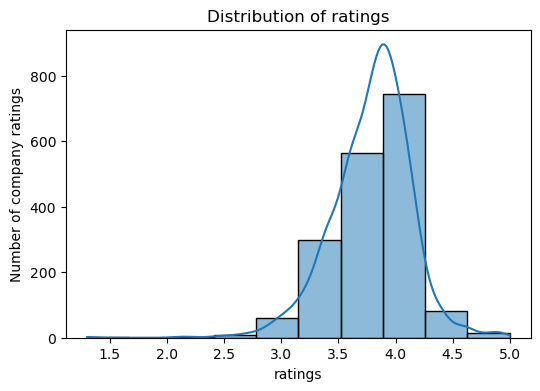

In [76]:

plt.figure(figsize=(6,4))
sns.histplot(df['ratings'],bins= 10, kde=True)
plt.title('Distribution of ratings')
plt.xlabel('ratings')
plt.ylabel('Number of company ratings')
plt.show()


### Obsrvation:
- The distribution of ratings is unimodal and slightly bell-shaped, with the highest concentration around 3.7–4.0.
- Extremely low or very high ratings are rare, indicating overall stable and positive company ratings.

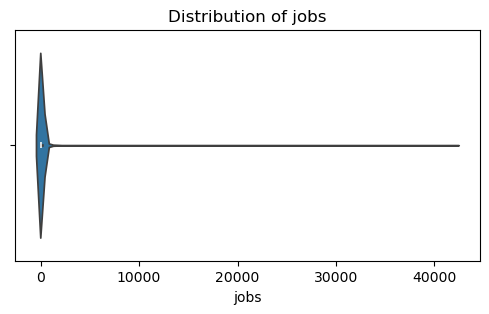

In [35]:

plt.figure(figsize=(6,3))
sns.violinplot(x=df['jobs'])
plt.title('Distribution of jobs')
plt.show()

### Observation:
- The violin plot shows a highly right-skewed distribution, with most companies having very low job openings.
- A few companies with extremely large job counts create a long tail, indicating unequal hiring activity across companies.

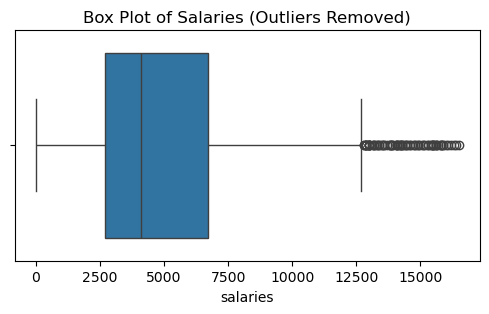

In [8]:

Q1 = df['salaries'].quantile(0.25)
Q3 = df['salaries'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[
    (df['salaries'] >= lower_bound) &
    (df['salaries'] <= upper_bound)
]
plt.figure(figsize=(6,3))
sns.boxplot(x=df_no_outliers['salaries'])
plt.title('Box Plot of Salaries (Outliers Removed)')
plt.show()

### Observation:
- After removing extreme outliers using the IQR method, the salary distribution becomes more compact and interpretable.

- The median salary lies slightly below the center of the box, indicating a right-skewed distribution even after outlier removal.

- Most companies offer salaries within a moderate range, while very high salary values were rare and treated as outliers.

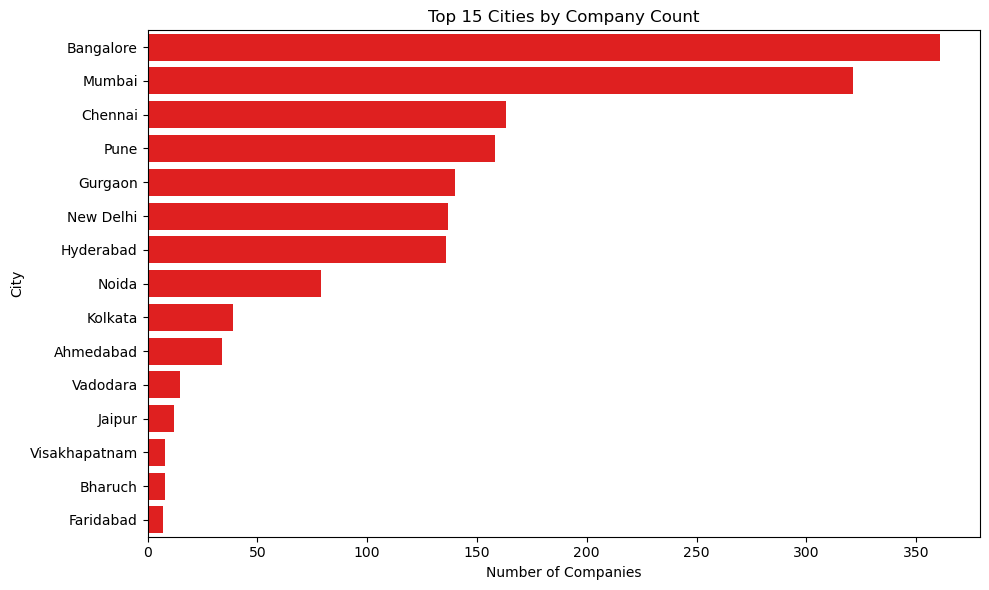

In [79]:
top_cities = df['city'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_cities.values,
    y=top_cities.index,color='red'
)

plt.title('Top 15 Cities by Company Count')
plt.xlabel('Number of Companies')
plt.ylabel('City')
plt.tight_layout()
plt.show()

### Observation:
- Bangalore has the highest number of companies, clearly emerging as the major corporate hub in the dataset.
- Mumbai ranks second, followed by Chennai and Pune, indicating strong business presence in metro cities.
- Mid-tier cities like Gurgaon, New Delhi, and Hyderabad show comparable company counts, reflecting growing corporate ecosystems.

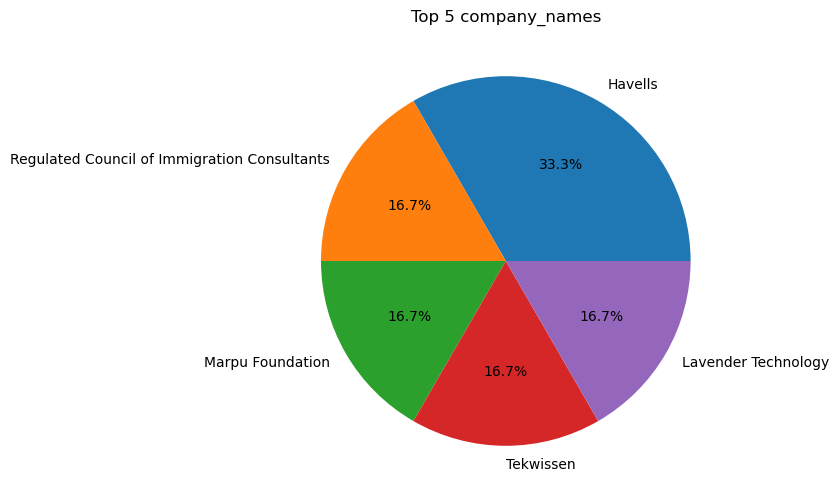

In [5]:
df['company_name'].value_counts().head(5).plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6)
)
plt.title('Top 5 company_names')
plt.ylabel('')
plt.show()

### Observation:
- The pie chart shows that a small number of companies dominate the dataset, contributing the largest share among the top 5.

- The remaining companies have much smaller proportions, indicating a skewed distribution where presence is concentrated among a few major players.

### Bivariate Analysis

### Categorical vs Numerical 

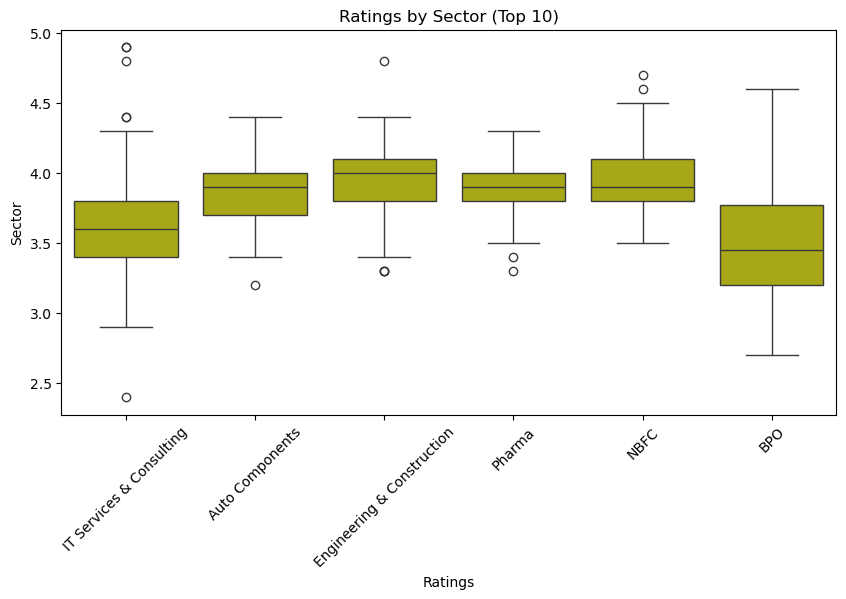

In [82]:
top_sectors = df['company_sector'].value_counts().head(6).index

plt.figure(figsize=(10,5))
sns.boxplot(
    y=df['ratings'],
    x=df['company_sector'],
    order=top_sectors,color='y'
)
plt.xticks(rotation=45)
plt.title('Ratings by Sector (Top 10)')
plt.xlabel('Ratings')
plt.ylabel('Sector')
plt.show()

### Observation:
- Engineering & Construction, Pharma, and NBFC sectors show higher median ratings, indicating better overall employee satisfaction compared to other sectors.

- IT Services & Consulting has a wider spread of ratings, suggesting mixed employee experiences across companies in this sector.

- BPO sector records a lower median rating with higher variability, reflecting comparatively lower satisfaction and inconsistent work conditions.

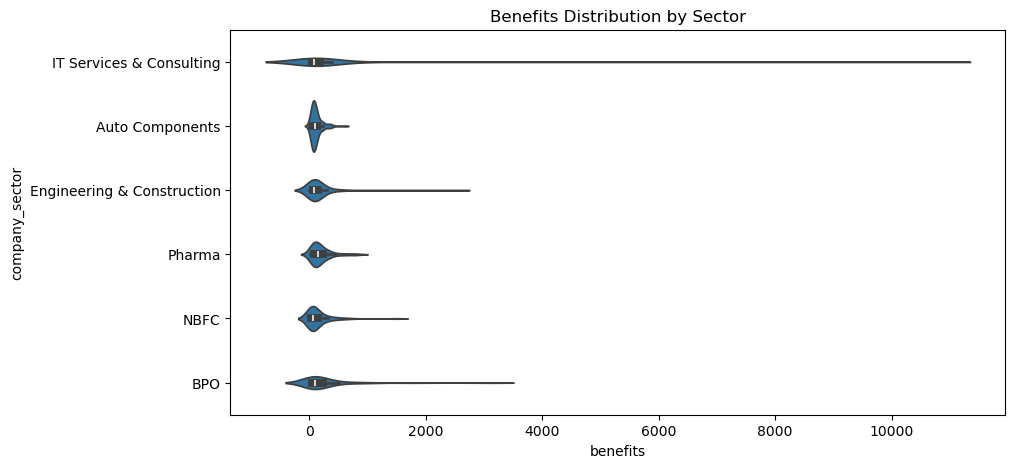

In [83]:
plt.figure(figsize=(10,5))
sns.violinplot(
    y=df['company_sector'],
    x=df['benefits'],
    order=top_sectors
)
plt.title('Benefits Distribution by Sector')
plt.show()

### Observation:
- IT Services & Consulting shows the widest distribution of benefits, indicating large variation in benefit offerings across companies in this sector.
- Engineering & Construction and NBFC sectors have a more concentrated distribution, suggesting relatively consistent benefit structures among companies.
- Pharma and Auto Components sectors display moderate benefit levels with limited variability, reflecting standardized benefit policies.

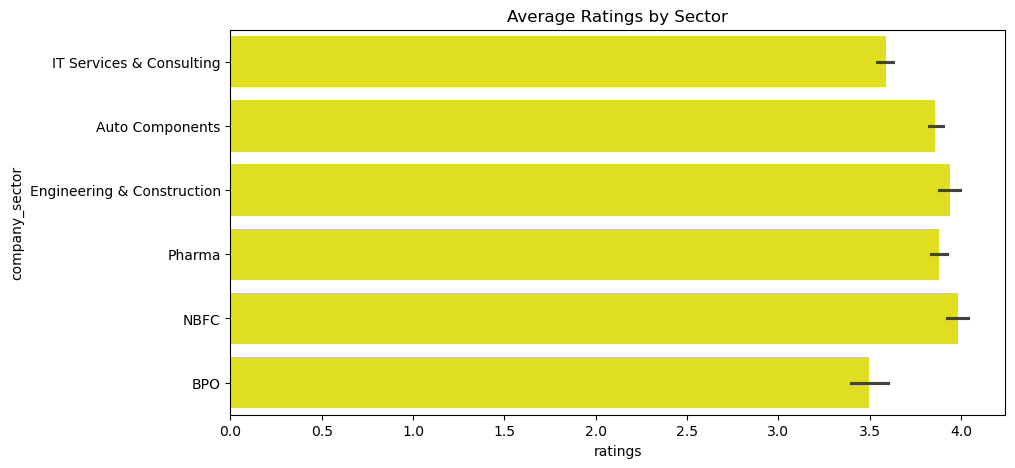

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(
    y=df['company_sector'],
    x=df['ratings'],
    order=top_sectors,
    estimator='mean',color='yellow'
)
plt.title('Average Ratings by Sector')
plt.show()

### Observation:
- NBFC records the highest average rating, indicating stronger overall employee satisfaction compared to other sectors.

- Engineering & Construction and Pharma also show high average ratings, reflecting positive work environments and employee experiences.

- Auto Components maintains a consistently good average rating, slightly below the top-performing sectors.

### Numerical vs  Numeircal

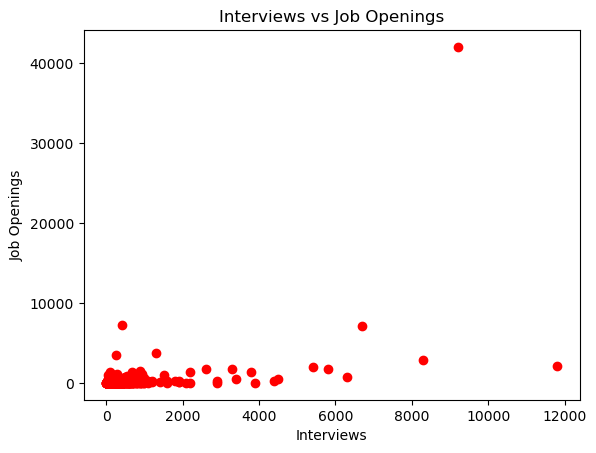

In [16]:
plt.figure()
plt.scatter(df["interviews"], df["job Openings"], color='r')
plt.xlabel("Interviews")
plt.ylabel("Job Openings")
plt.title("Interviews vs Job Openings")
plt.show()


### Observation:
- No strong linear relationship is evident between the number of interviews conducted and job openings, indicating that more interviews do not always translate into more vacancies.

- Most companies cluster at low interview counts and low job openings, suggesting limited hiring activity across the majority of organizations.

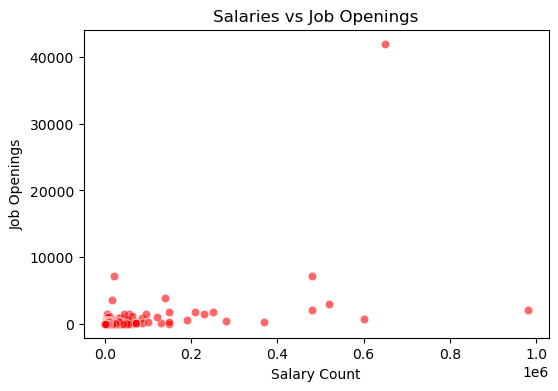

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['salaries'], y=df['jobs'], alpha=0.6, color='r')
plt.title('Salaries vs Job Openings')
plt.xlabel('Salary Count')
plt.ylabel('Job Openings')
plt.show()

### Observation:
- Weak correlation is observed between salary count and job openings, indicating that higher salary figures do not necessarily correspond to more job vacancies.
- Most data points are clustered at low salary counts and low job openings, suggesting that the majority of companies report modest salaries with limited hiring.

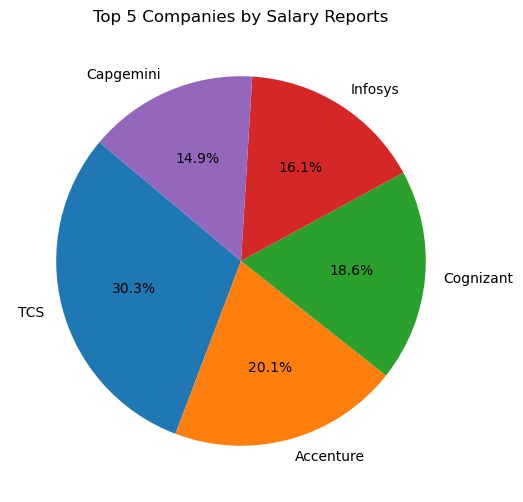

In [213]:
top_salary_companies = df.sort_values(by='salaries', ascending=False).head(5)

plt.figure(figsize=(6,6))
plt.pie(
    top_salary_companies['salaries'],
    labels=top_salary_companies['company_name'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Top 5 Companies by Salary Reports')
plt.show()

### Observation:
- TCS dominates salary reports, contributing the largest share (~30%), indicating a high volume of reported salary data among the top companies.
- Accenture and Cognizant together account for nearly 39%, showing strong representation and competitive presence in salary disclosures.

### Multivariate Analysis

### Categorical+Numerical+CAtegorical

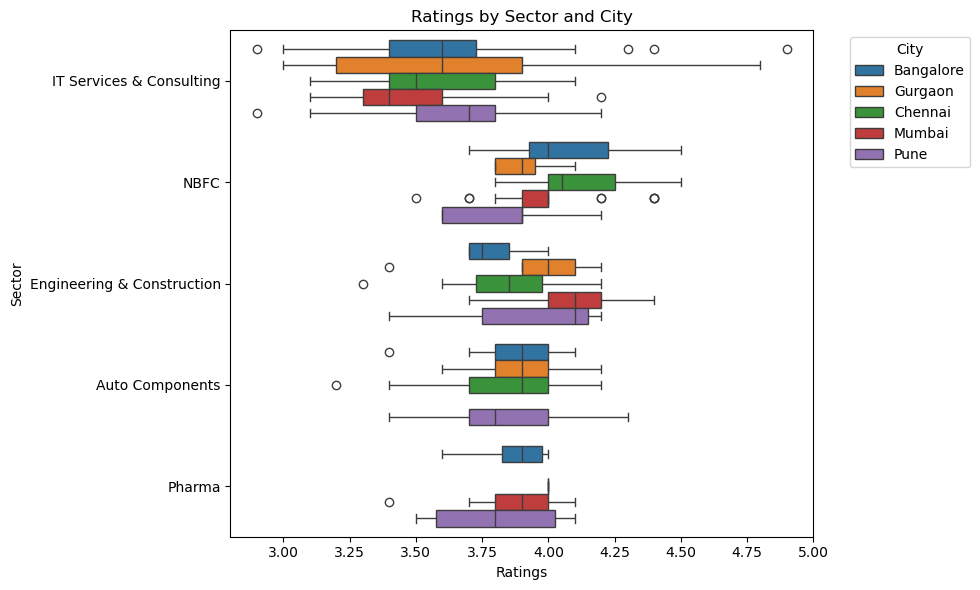

In [85]:

top_sectors = df['company_sector'].value_counts().head(5).index
top_cities = df['city'].value_counts().head(5).index

filtered_df = df[
    (df['company_sector'].isin(top_sectors)) &
    (df['city'].isin(top_cities))
]

plt.figure(figsize=(10,6))
sns.boxplot(
    data=filtered_df,
    x='ratings',
    y='company_sector',
    hue='city'
)

plt.title('Ratings by Sector and City')
plt.xlabel('Ratings')
plt.ylabel('Sector')
plt.legend(title='City', bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()

### Observation:
- IT Services & Consulting shows the widest spread in ratings, indicating high variability in employee experience across cities, with a few high-rating outliers.
- NBFC and Engineering & Construction sectors have more consistent ratings across cities, suggesting relatively stable employee satisfaction levels.
- Mumbai and Bangalore generally record slightly higher median ratings across most sectors, reflecting stronger workplace ecosystems in these cities.

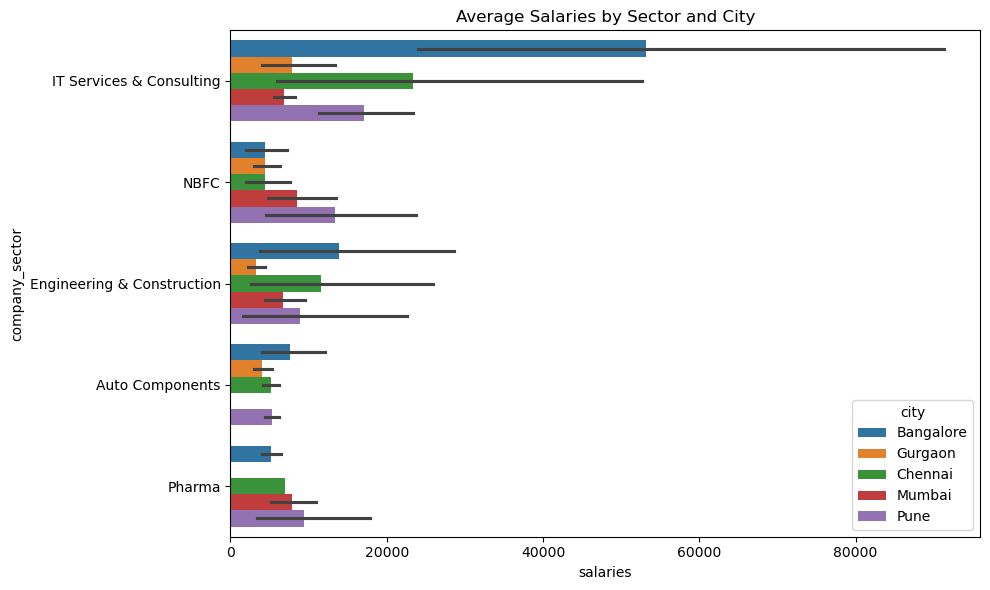

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=filtered_df,
    x='salaries',
    y='company_sector',
    hue='city',
    estimator='mean'
)

plt.title('Average Salaries by Sector and City')
plt.tight_layout()
plt.show()

### Observation:
- IT Services & Consulting shows the highest average salaries overall, with Bangalore and Mumbai leading within this sector, highlighting their role as major tech salary hubs.
- Across most sectors, Bangalore consistently offers higher average salaries compared to other cities, indicating stronger demand and higher cost-of-living adjustments.
- Engineering & Construction and NBFC sectors display moderate salary levels, with noticeable variation across cities, suggesting city-specific market influences.

### categorical vs categorical vs categoriacal

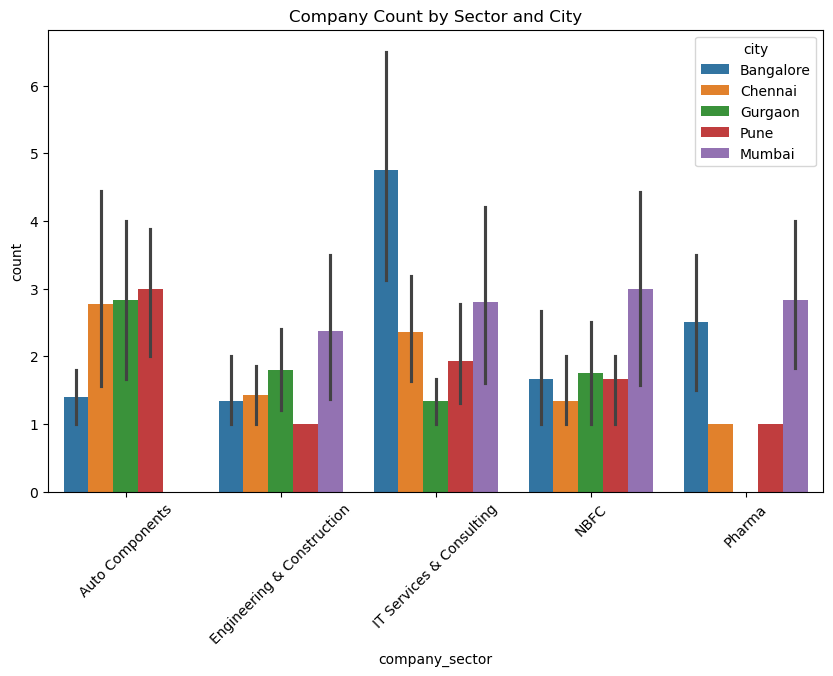

In [221]:
grouped = (
    filtered_df
    .groupby(['company_sector', 'city', 'ratings'])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=grouped,
    x='company_sector',
    y='count',
    hue='city'
)

plt.title('Company Count by Sector and City')
plt.xticks(rotation=45)
plt.show()

### Observation:
- IT Services & Consulting shows the highest company counts, especially in Bangalore and Mumbai, highlighting these cities as major hubs for this sector.
- Auto Components and NBFC are more evenly distributed across cities, while Pharma and Construction have comparatively fewer companies and are concentrated in select cities.

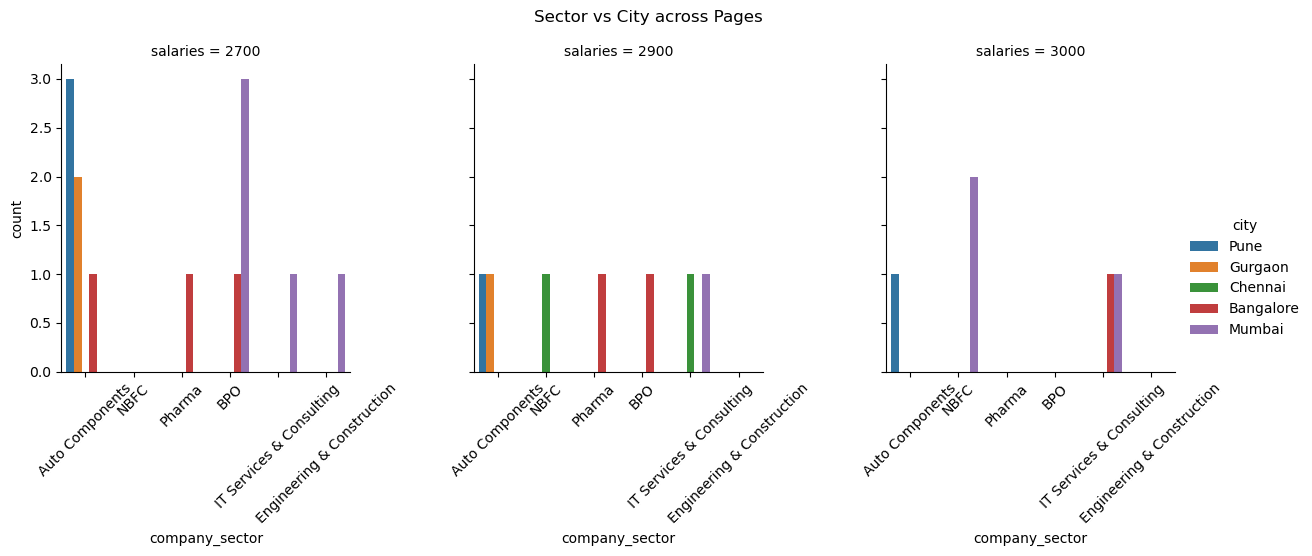

In [225]:
top_sectors = df['company_sector'].value_counts().head(6).index
top_cities = df['city'].value_counts().head(5).index
top_pages = df['salaries'].value_counts().head(3).index

filtered_df = df[
    (df['company_sector'].isin(top_sectors)) &
    (df['city'].isin(top_cities)) &
    (df['salaries'].isin(top_pages))
]

g = sns.catplot(
    data=filtered_df,
    x='company_sector',
    hue='city',
    col='salaries',
    kind='count',
    col_wrap=3,
    height=4
)

g.set_xticklabels(rotation=45)
g.fig.suptitle('Sector vs City across Pages', y=1.05)
plt.show()

### Observation:
- The IT Services & Consulting and BPO sectors dominate across the top cities, showing consistent presence at multiple salary levels.
- Bangalore and Mumbai contribute the highest counts overall, while higher salary bands appear less frequent and more city-specific, indicating concentrated high-pay opportunities.

### Numerical vs Numerical vs Numerical

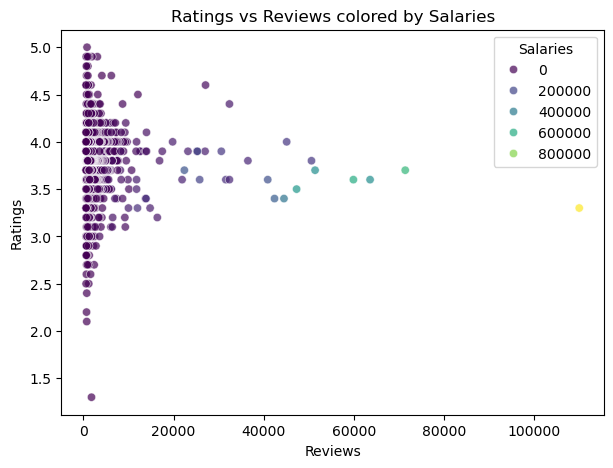

In [90]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='reviews',
    y='ratings',
    hue='salaries',
    palette='viridis',
    alpha=0.7)

plt.title('Ratings vs Reviews colored by Salaries')
plt.xlabel('Reviews')
plt.ylabel('Ratings')
plt.legend(title='Salaries')
plt.show()

### Observation:
- Most companies have low to moderate salaries and review counts, clustering around 3–4 ratings, indicating average employee satisfaction.
- Higher salaries (lighter colors) appear mostly at higher review volumes, but they do not guarantee higher ratings, showing weak salary–rating dependence.

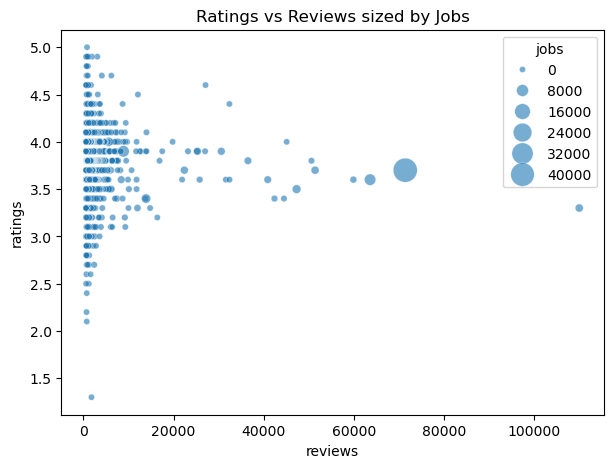

In [228]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='reviews',
    y='ratings',
    size='jobs',
    sizes=(20, 300),
    alpha=0.6
)

plt.title('Ratings vs Reviews sized by Jobs')
plt.show()


### Observation:
- Most companies cluster between 3.0–4.0 ratings regardless of review volume, indicating generally stable employee satisfaction.
- Larger bubbles (more jobs) are concentrated at higher review counts, suggesting that companies with greater hiring activity also receive more employee feedback.

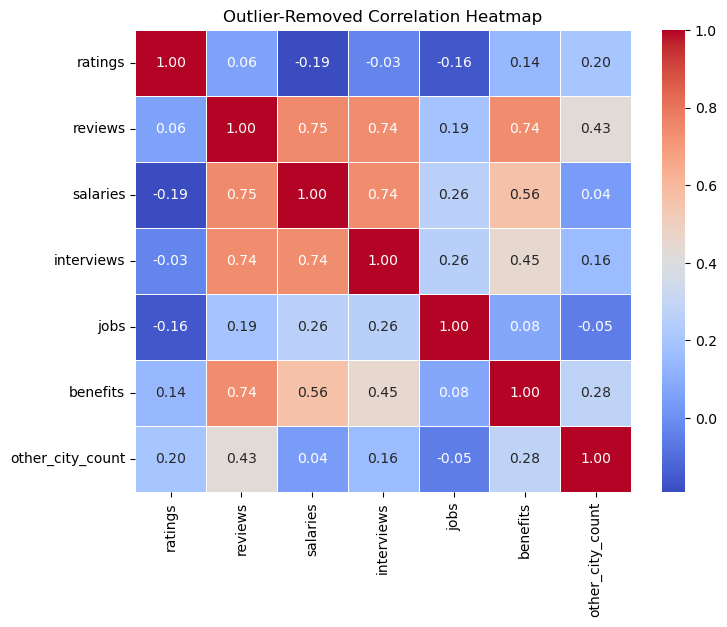

In [227]:
# Select numerical columns
num_cols = ['ratings','reviews','salaries','interviews','jobs','benefits','other_city_count']

# Remove outliers using IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | 
                      (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Correlation heatmap
plt.figure(figsize=(8,6))
corr = df_no_outliers[num_cols].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)

plt.title('Outlier-Removed Correlation Heatmap')
plt.show()


### Observation:
- After removing outliers, correlations appear more stable and realistic, reducing distortion caused by extreme values.
- Reviews, salaries, interviews, and jobs maintain moderate positive relationships, while ratings remain weakly correlated.

### Summary:

- The primary objective of this analysis was to understand how company sector and location influence employee satisfaction, compensation, and hiring activity.

- From the analysis, IT Services & Consulting emerged as the dominant sector, showing higher salary levels, more reviews, and increased interview activity, especially in metropolitan cities like Bangalore and Hyderabad.

- The correlation analysis revealed strong relationships between reviews, salaries, and interviews, indicating that larger and more visible organizations tend to offer better compensation and attract more candidates.

- Overall, the project demonstrates how data analytics can uncover meaningful employment trends while also addressing practical challenges in real-world datasets.